# Temperature and polarization beams(Focal plane)


# Temp. beam, Temp. beam response, solid angle + uncertainties 

- $B(\theta) = \left(\sum a_{2n}H_{2n}\left(\frac{\theta}{\sigma_{b}}\right) \right)\exp\left(-\frac{1}{2}\frac{\theta^{2}}{\sigma_{b}}\right)  $, with $B(\theta=0)=1$.
- $b^{T}_{l} = \frac{1}{\Omega_{b}}\int d\Omega B(\theta)P_{l}(\cos(\theta))$, the beam solid angle is obtained when $l=1$: $\Omega_{b} = \int d\Omega B(\theta)$. With its uncertainties defined by $\Delta  \Omega^{2} =\langle (\delta \Omega)^{2} \rangle = \sum_{nm} \Omega_{n} \Sigma_{n m}^{a} \Omega_{m}$. Finally $\Omega_b = \Omega_{b} \pm \Delta  \Omega $.


# Files
Input_files:
- sigma     = 'sigma_focal_plane.txt'
- coef      = 'parameters_focal_plane.txt'
- cov       = 'covariance_focal_plane.txt'
- norm_coef = 'normalized_parameters_focal_plane.txt'
- norm_cov  = 'normalized_covariance_focal_plane.txt'


Output_files:
- norm_coef = 'normalized_parameters_focal_plane.txt'
- norm_cov  = 'normalized_covariance_focal_plane.txt'
- omega     = 'OMEGA.txt'


Output/input_files:
- BT          = 'B_ell_T_i%s.txt' % str(l_max)    #l_max=250

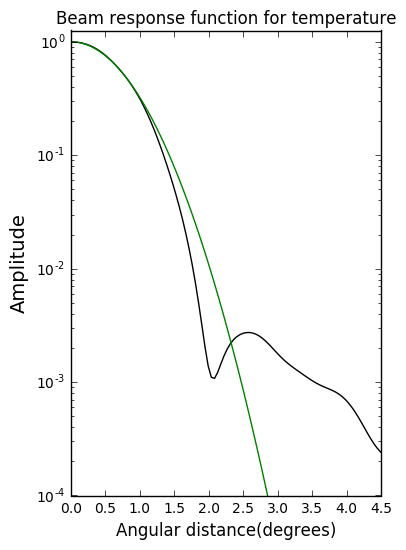

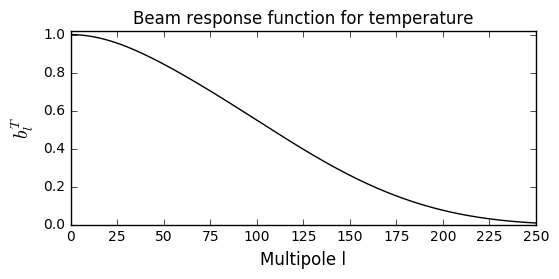

[ 1.]
FWHM = 1.56623354948 (degrees)
Solid_angle_beam = 7.98E-04 +/-  2.63E+01 (str)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy.polynomial.hermite import hermval
from scipy.special import hermite
from scipy.special import legendre
import scipy.integrate as integrate
from scipy.special import lpmv
from scipy.integrate import quad
from scipy.special import *
from scipy import optimize
from decimal import Decimal

################################################################
def BEAM_normalization(sigma, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15):
    coef   = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15])
    beam   = 0.0
    beam_0 = 0.0
    # sigma linear scale transformation from deg -- > rad.
    sigma = (2*np.pi/360.0)*sigma  
    for n in range(0, coef.shape[0]):
        beam_0  = beam_0 + coef[n]*np.exp(-(0.0**2)/(2*sigma**2))*(hermite(2*n)(0.0))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5)) 
    return beam_0 

################################################################
def beam16(theta_array, sigma, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15):
    coef   = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15])
    beam   = 0.0
    beam_0 = 0.0
    for n in range(0, coef.shape[0]):
        beam    = beam + coef[n]*np.exp(-(theta_array**2)/(2*sigma**2))*(hermite(2*n)(theta_array/sigma))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5))
        beam_0  = beam_0 + coef[n]*np.exp(-(0.0**2)/(2*sigma**2))*(hermite(2*n)(0.0))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5))
    return beam/beam_0
################################################################
# Normalized beam
def BEAM(theta,sigma, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15):
    coef   = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15])
    beam   = 0.0
    sigma  = (2*np.pi/360.0)*sigma  
    for n in range(0, coef.shape[0]):
        beam    = beam + coef[n]*np.exp(-(theta**2)/(2*sigma**2))*(hermite(2*n)(theta/sigma))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5))
    return beam
#############################################################
# Beam component of hermite expansion
def BEAM_2i(theta,sigma,n):
    # parameters(theta,sigma, n)
    sigma    = (2*np.pi/360.0)*sigma 
    beam_2i  = np.exp(-(theta**2)/(2*sigma**2))*(hermite(2*n)(theta/sigma))*(((2**(2*n))*gamma(2*n+1)*(np.pi**0.5)*sigma)**(-0.5))
    return beam_2i
#############################################################
#Integrand
def integrand(theta,sigma,l,i): 
    #parameter(angle,sigma,ell, 2i-hermite, standard deviation)
    return (2*np.pi)*np.sin(theta)*BEAM_2i(theta,sigma,i)*(legendre(l)(np.cos(theta)))
#############################################################
def basis_trans(sigma,l,i): 
    #notice that we are transformorming the basis only until 0.2/pi(rad), one order of magnitud above.
    # which is good 4.5/180 almost 2 order of magnitud(degres)
    B_l_i = quad(integrand,0.0,np.pi, args = (sigma,l,i), epsabs = 10**-8)[0]
    return B_l_i
#############################################################
theta_max = 0.08  #rad
theta     = np.linspace(0, theta_max, 100, dtype = float)

l_max = 250
i_max = 15

###############################################################
#coef      = np.loadtxt('parameters_det57_08.txt', dtype = float)
#pcov_beam = np.loadtxt('covariance_det57_08.txt', dtype = float)
#coef      = np.loadtxt('parameters_focal_plane.txt', dtype = float)
#cov       = np.loadtxt('covariance_focal_plane.txt', dtype = float)

sigma     = np.loadtxt('sigma_focal_plane.txt', dtype = float, ndmin = 1)[0]
coef      = np.loadtxt('coef_16.txt', dtype = float)
cov       = np.loadtxt('cov_16.txt', dtype = float)
beam_0    = BEAM_normalization(sigma,*coef)

#print coef
#print 'B_0', beam_0

norm_coef = coef/beam_0
norm_cov  = cov/((beam_0)**2)
     
np.savetxt('normalized_parameters_focal_plane.txt', norm_coef, fmt='%s')
np.savetxt('normalized_covariance_focal_plane.txt', norm_cov, fmt='%s')
    
norm_coef = np.loadtxt('normalized_parameters_focal_plane.txt', dtype = float)
norm_cov  = np.loadtxt('normalized_covariance_focal_plane.txt', dtype = float)


def FWHM(theta):
    return BEAM(theta, sigma, *norm_coef)-0.5
    
minimum = optimize.brentq(FWHM, 0, 0.2)

#print'FWHM','=' ,2*minimum*180/np.pi, '(degrees)'


plt.close('all')        
f, (ax1) = plt.subplots(1, sharex = True)
ax1.set_title('Beam response function for temperature')
ax1.plot(theta*180/np.pi, BEAM(theta,sigma,*norm_coef),'k')
ax1.plot(theta*180/np.pi, np.exp(-0.5*(theta/(sigma*(np.pi/180.0)))**2),'g')
ax1.set_xlabel('Angular distance(degrees)', size= 12)
ax1.set_ylabel('Amplitude', size = 14.0)     
ax1.set_xlim([0, 4.5])
ax1.set_ylim([10**(-4), 10**(0.1)])
#ax1.set_xticks(ticks = [0,25,50,75,100,125,150,175,200,225,250], minor = False)
#ax1.set_yticks(ticks = [0,0.25,0.5,0.75,1], minor = False)
ax1.set_yscale('Log')
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)  
f = plt.gcf()
f.set_size_inches(4.0,6)

#name_fig_bell_pol = "/home/bastian/plots/beam_response_function_T%s.pdf"   % str(l_max)
#plt.savefig(name_fig_bell_pol, bbox_inches = "tight")   

plt.show()
# the integration is between 0 to pi.

#############################################################
################ Solid angle computations ###################
#############################################################

e_scaling = 1.0
OMEGA     = np.zeros(norm_coef.shape[0] + 1, dtype = float)
#Fill the first element with the average of the solid Beam solid angle
OMEGA[0]  = integrate.quad(lambda theta: (e_scaling)*2*np.pi*np.sin(theta)*BEAM(theta,sigma,*norm_coef)\
                           ,0.0, np.pi, epsabs = 10**-8)[0]

# I have to figure out how normalize the coefficient before compute ----> modify some functions.
# we have to modify the scalar functions BEAM in function to receive just a parameter.

for n in range(1, OMEGA.shape[0]):
    OMEGA[n] = integrate.quad(lambda theta: (e_scaling)*2*np.pi*np.sin(theta)*BEAM_2i(theta,sigma,n-1)\
                              ,0.0, np.pi, epsabs = 10**-8)[0]
    

np.savetxt('OMEGA.txt', OMEGA, fmt ='%s')    
OMEGA    =  OMEGA/(e_scaling)

#print 'Omega'
#print OMEGA

suma     = 0.0
for n in range(0, norm_coef.shape[0]):   
    suma = suma + norm_coef[n]*OMEGA[n + 1]
   
#print OMEGA[0]  
#print suma  

beam_0    = BEAM_normalization(sigma,*norm_coef)
#############################################################
############          Solid angle                ############ 
#############################################################
#print 'OMEGA shape', OMEGA.shape
#print 'norm_cov shape', norm_cov.shape

#print OMEGA[1:]

OMEGA_t  = OMEGA[1:].reshape((1, OMEGA[1:].shape[0]))   
OMEGA_v  = OMEGA[1:].reshape((OMEGA[1:].shape[0],1))

Sigma_Omega_2 = np.dot(OMEGA_t, np.dot(norm_cov, OMEGA_v))[0][0]

#print 'Sigma_Omega_2', Sigma_Omega_2
#print 'Sigma_Omega', (Sigma_Omega_2)**0.5
#print ' Solid_angle_beam =', str(  Decimal(OMEGA[0])  ), '+/- ', str((Sigma_Omega_2)**0.5)      
#print 'OMEGA', OMEGA[0]-(Sigma_Omega_2)**0.5, OMEGA[0] + (Sigma_Omega_2)**0.5


name_T = 'B_ell_T_i%s.txt' % str(l_max)
#############################################################
##########  Harmonic transformation
#############################################################
# The harmonic transform of the i-th component.
#BT  = np.zeros([l_max + 1, i_max + 1], dtype = float)
#for l in range(0, l_max + 1):      
#    for i in range(0, i_max + 1):
#        BT[l,i] = basis_trans(sigma,l,i)
#np.savetxt(name_T, BT, fmt='%s')
#############################################################
BT      = np.loadtxt(name_T, dtype = float)[0:l_max + 1, 0:i_max + 1]
B_ell_T = np.dot(BT, norm_coef[:i_max + 1])
B_ell_T = B_ell_T.reshape((BT.shape[0],1))
b_ell_T = B_ell_T/OMEGA[0]

#print b_ell_T

# Save_beam 
np.savetxt('b_ell_T.txt', b_ell_T, fmt='%s')

#############################################################
#############################################################
#############################################################
l = np.arange(0, l_max + 1, 1) 
f, (ax1) = plt.subplots(1, sharex=True)
ax1.set_title('Beam response function for temperature')
ax1.plot(l, b_ell_T,'k')
ax1.set_xlabel('Multipole l', size= 12)
ax1.set_ylabel('$b_{l}^{T}$', size =14.0)     
ax1.set_xlim([0, l_max])
ax1.set_ylim([0,1.02])
ax1.set_xticks(ticks = [0,25,50,75,100,125,150,175,200,225,250], minor = False)
#ax1.set_yticks(ticks = [0,0.25,0.5,0.75,1], minor = False)

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)  
f = plt.gcf()
f.set_size_inches(6.0,2.5)

#name_fig_bell_pol = "/home/bastian/plots/beam_response_function_T%s.pdf"   % str(l_max)
#plt.savefig(name_fig_bell_pol, bbox_inches = "tight")   

plt.show()

print b_ell_T[0]

print'FWHM','=' ,2*minimum*180/np.pi, '(degrees)'
print'Solid_angle_beam =', str( '%.2E' % Decimal(OMEGA[0]) ), '+/- ',str( '%.2E' % Decimal((Sigma_Omega_2)**0.5) ),'(str)'



# Polarization

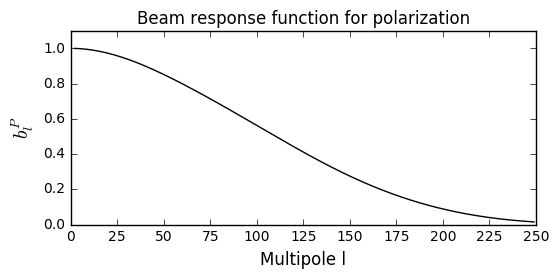

[ 0.99986332]


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy.polynomial.hermite import hermval
from scipy.special import hermite
from scipy.special import legendre
import scipy.integrate as integrate
from scipy.special import lpmv
from scipy.integrate import quad
from scipy.special import *

# Spin -2 legendre
def s_minus_2_legendre(theta,l,m):
#parameters(angle,ell,emm)
    return -((0.0 + l - m**2.0)/(np.sin(theta)) + 0.5*l*(l-1)*np.sin(theta))*lpmv(m,l,np.cos(theta)) +(0.0 + l + m)*((np.tan(theta))**(-1))*lpmv(m,l-1, np.cos(theta)) +((0.0 + m)*(l-1.0)*((np.tan(theta))**(-1))*lpmv(m, l, np.cos(theta))-((0.0 + m)/(np.sin(theta)))*(l+m)*lpmv(m,l-1,np.cos(theta))) 
################################################################
# Coefficient.
def M_lm(l):
    #parameters(ell,emm)
    return  (2.0/((l+2)*(l+1)*(l+0)*(l-1))) 
################################################################
def BEAM_normalization(sigma, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15):
    coef   = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15])
    beam   = 0.0
    beam_0 = 0.0
    # sigma linear scale transformation from deg -- > rad.
    sigma = (2*np.pi/360.0)*sigma  
    for i in range(0, coef.shape[0]):
        beam_0  = beam_0 + coef[i]*np.exp(-(0.0**2)/(2*sigma**2))*(hermite(2*i)(0.0))  
    return beam_0 
################################################################
# Normalized beam.
def BEAM(theta_array,sigma, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15):
    coef   = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15])
    beam   = 0.0
    sigma = (2*np.pi/360.0)*sigma  
    for i in range(0, coef.shape[0]):
        beam    = beam + coef[i]*np.exp(-(theta_array**2)/(2*sigma**2))*(hermite(2*i)(theta_array/sigma))
    return beam
#############################################################
# Unnormalized.
def BEAM_unnormalized(theta_array, sigma, c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15):
    coef        = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15])
    beam        = 0.0
    beam_0      = 0.0
    sigma       = (2*np.pi/360.0)*sigma  #0.68560261683
    for i in range(0, coef.shape[0]):
        beam_0  = beam_0 + coef[i]*(hermite(2*i)(0.0))
        beam    = beam   + coef[i]*np.exp(-(theta_array**2)/(2*sigma**2))*(hermite(2*i)(theta_array/sigma))
    return beam
#############################################################
# Beam component of hermite expansion
def BEAM_2i(theta,sigma,i):
    # parameters(theta,sigma, i)
    sigma    = (2*np.pi/360.0)*sigma     #0.68560261683
    beam_2i  = np.exp(-(theta**2)/(2*sigma**2))*(hermite(2*i)(theta/sigma))
    return beam_2i
#############################################################
#Integrand
def integrand(theta,sigma,l,i): 
    #parameter(angle, ell, 2i-hermite, standard deviation)
    return M_lm(l)*(2*np.pi)*BEAM_2i(theta,sigma,i)*s_minus_2_legendre(theta,l,2)
#############################################################
def basis_trans(sigma,l,i): 
    #notice that we are transformorming the basis only until 0.2/pi(rad), one order of magnitud above.
    # which is good 4.5/180 almost 2 order of magnitud(degres)
    B_l_i = quad(integrand, 0.0, np.pi, args = (sigma,l,i),epsabs = 10**-8)[0]
    return B_l_i
#############################################################
#theta = np.linspace(0,10,1000, dtype = float)
l_max     = 250
i_max     = 12
###############################################################
sigma        = np.loadtxt('sigma_focal_plane.txt', dtype = float, ndmin = 1)[0]
norm_coef    = np.loadtxt('normalized_parameters_focal_plane.txt', dtype = float)
norm_cov     = np.loadtxt('normalized_covariance_focal_plane.txt', dtype = float)
OMEGA        = np.loadtxt('OMEGA.txt', dtype = float, ndmin = 1)
###############################################################
# Coefficient from the fit to the beam function.
l            = np.arange(0, l_max + 1, 1) 
#############################################################
#BP  = np.zeros([l_max + 1, i_max + 1], dtype = float)
#for l in range(2, l_max + 1):      
#    for i in range(0, i_max + 1):
#        BP[l,i] = basis_trans(sigma,l,i)
#############################################################
name_P = 'B_ell_p_i%s.txt' % str(l_max)
#np.savetxt(name_P,BP, fmt='%s')
BP     = np.loadtxt(name_P, dtype = float)[0:l_max + 1, 0:i_max + 1]
###############################################################
B_ell_p = np.dot(BP, norm_coef[:i_max + 1])
B_ell_p = B_ell_p.reshape((BP.shape[0],1))
l       = np.arange(0, l_max + 1, 1) 
b_ell_p = B_ell_p/OMEGA[0]
###############################################################
#Beam response function.
plt.close('all')        
f, (ax2) = plt.subplots(1, sharex = True)
ax2.set_title('Beam response function for polarization')
ax2.plot(l[2:l_max], b_ell_p[2:l_max],'k')
ax2.set_xlabel('Multipole l', size= 12)
ax2.set_ylabel('$b_{l}^{P}$', size =14.0)     
ax2.set_xlim([0, l_max])
ax2.set_ylim([0,1.02])
ax2.set_xticks(ticks = [0,25,50,75,100,125,150,175,200,225,250], minor = False)
#ax2.set_yticks(ticks = [0,0.25,0.5,0.75,1], minor=False)

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)  

f = plt.gcf()
f.set_size_inches(6.0,2.5)

#name_fig_bell_pol = "/home/bastian/plots/beam_response_function_pol%s.pdf" % str(l_max)
#plt.savefig(name_fig_bell_pol, bbox_inches = "tight")   

plt.show()
############################################################
############################################################
print b_ell_p[2]
############################################################
############################################################


# Cross window function.

Lowest multipole(l = 0)= 1.0
Lowest multipole(l = 2)= 0.999726660924
Lowest multipole(l = 2)= 0.999453398773
TT window function


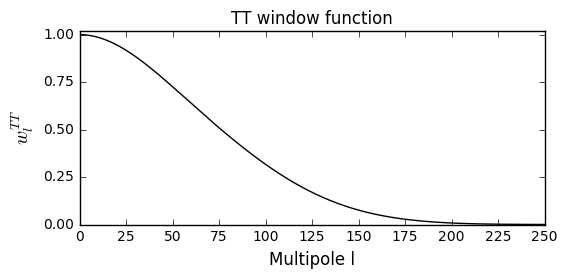

PP window function


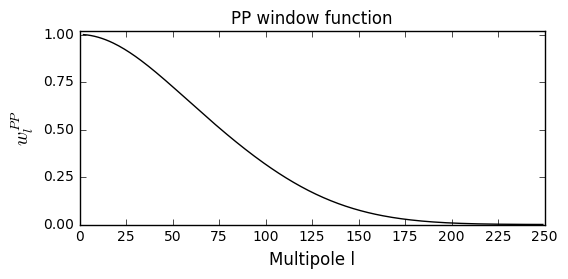

TP window function


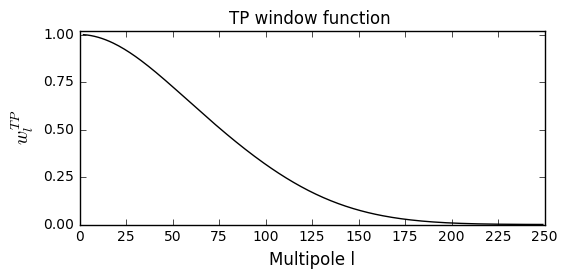

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import fft
from numpy.polynomial.hermite import hermval
from scipy.special import hermite
from scipy.special import legendre
import scipy.integrate as integrate

#################################################
l_max = 250
i_max = 12
#Change solid angle

sigma        = np.loadtxt('sigma_focal_plane.txt',    dtype = float, ndmin = 1)[0]
norm_coef    = np.loadtxt('normalized_parameters_focal_plane.txt', dtype = float)
norm_cov     = np.loadtxt('normalized_covariance_focal_plane.txt', dtype = float)[:i_max + 1,:i_max + 1]
OMEGA        = np.loadtxt('OMEGA.txt', dtype = float, ndmin = 1)
Omega        = OMEGA[0]

l        = np.arange(0, l_max + 1, 1) 
###################################################
# T and P
name_T   = 'B_ell_T_i%s.txt' % str(l_max)
name_P   = 'B_ell_p_i%s.txt' % str(l_max)

BT       = np.loadtxt(name_T, dtype = float)[0:l_max + 1, 0:i_max + 1]
BP       = np.loadtxt(name_P, dtype = float)[0:l_max + 1, 0:i_max + 1]
####################################################
# Coeff and cov parameters. 

# Dot product between B_l_i and c_i to get the component.
B_ell_T  = np.dot(BT, norm_coef[:i_max + 1])
B_ell_T  = B_ell_T.reshape((BT.shape[0],1))

b_ell_T  = B_ell_T/OMEGA[0]


B_ell_p  = np.dot(BP, norm_coef[:i_max + 1])
B_ell_p  = B_ell_p.reshape((BP.shape[0],1))

b_ell_p  = B_ell_p/OMEGA[0]


w_ell_TT = (b_ell_T)**2
w_ell_PP = (b_ell_p)**2
w_ell_TP = (b_ell_T)*(b_ell_p)


print 'Lowest multipole(l = 0)=', w_ell_TT[0][0]
print 'Lowest multipole(l = 2)=', w_ell_PP[2][0]
print 'Lowest multipole(l = 2)=', w_ell_TP[2][0]

####################################################

name_TT = 'w_ell_TT%s.txt' % str(l_max)
name_PP = 'w_ell_PP%s.txt' % str(l_max)
name_TP = 'w_ell_TP%s.txt' % str(l_max)

np.savetxt(name_TT, w_ell_TT, fmt='%s')
np.savetxt(name_PP, w_ell_PP, fmt='%s')
np.savetxt(name_TP, w_ell_TP, fmt='%s')


####################################################
print 'TT window function'
plt.close('all')        
f, (ax2) = plt.subplots(1, sharex=True)
ax2.set_title('TT window function')
ax2.plot(l, w_ell_TT,'k')
ax2.set_xlabel('Multipole l', size= 12)
ax2.set_ylabel('$w_{l}^{TT}$', size =14.0)     
ax2.set_xlim([0, l_max])
ax2.set_xticks(ticks = [0,25,50,75,100,125,150,175,200,225,250], minor = False)
ax2.set_yticks(ticks = [0,0.25,0.5,0.75, 1.00], minor = False)
ax2.set_ylim([0,1.02])

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)  

f = plt.gcf()
f.set_size_inches(6.0,2.5)
#plt.savefig("/home/bastian/plots/window_TT.pdf", bbox_inches="tight")       
plt.show()

###################################################
print 'PP window function'
plt.close('all')        
f, (ax2) = plt.subplots(1, sharex=True)
ax2.set_title('PP window function')
ax2.plot(l[2:l_max], w_ell_PP[2:l_max],'k')
ax2.set_xlabel('Multipole l', size= 12)
ax2.set_ylabel('$w_{l}^{PP}$', size =14.0)     
ax2.set_xlim([0, l_max])
ax2.set_ylim([0,1.02])
ax2.set_xticks(ticks = [0,25,50,75,100,125,150,175,200,225,250], minor = False)
ax2.set_yticks(ticks =[0,0.25,0.5,0.75, 1.00], minor=False)

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)  

f = plt.gcf()
f.set_size_inches(6.0,2.5)
#plt.savefig("/home/bastian/plots/window_PP.pdf", bbox_inches="tight")       
plt.show()


###############################################################
###############################################################
#  Window function for cross correlators
###############################################################
###############################################################
print 'TP window function'
plt.close('all')        
f, (ax2) = plt.subplots(1, sharex=True)
ax2.set_title('TP window function ')
ax2.plot(l[2:l_max], w_ell_TP[2:l_max],'k')
ax2.set_xlabel('Multipole l', size= 12)
ax2.set_ylabel('$w_{l}^{TP}$', size =14.0)     
ax2.set_xlim([0, l_max])
ax2.set_ylim([0,1.02])
ax2.set_xticks(ticks = [0,25,50,75,100,125,150,175,200,225,250], minor = False)
ax2.set_yticks(ticks = [0,0.25,0.5,0.75, 1.00], minor=False)

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible = False)  

f = plt.gcf()
f.set_size_inches(6.0,2.5)
#plt.savefig("/home/bastian/plots/window_TP.pdf", bbox_inches="tight")       
plt.show()
###############################################################
###############################################################



# Covariance matrices and correlation matrices

## Files


Input_files:


- sigma        = 'sigma_focal_plane.txt'
- norm_coef    = 'normalized_parameters_focal_plane.txt'
- norm_cov     = 'normalized_covariance_focal_plane.txt'
- OMEGA        = 'OMEGA.txt'
- BT           = 'B_ell_T_i%s.txt' % str(l_max),  #(l_max=250)
- BP           = 'B_ell_p_i%s.txt' % str(l_max),  #(l_max=250)


Output_files:

- w_ell_TT_f_error = 'w_ell_TT_f_error%s.txt' % str(l_max), #(l_max=250)
- w_ell_PP_f_error = 'w_ell_PP_f_error%s.txt' % str(l_max), #(l_max=250)
- w_ell_TP_f_error = 'w_ell_TP_f_error%s.txt' % str(l_max), #(l_max=250)
  
Output/input_files:
    
    





Context(prec=50, rounding=ROUND_HALF_EVEN, Emin=-999999999, Emax=999999999, capitals=1, flags=[], traps=[DivisionByZero, Overflow, InvalidOperation])
Sigma_B_TT_01[0,0]= 5.62469683526e-12
Sigma_B_TT_02[0,0]= 5.62469683527e-12
Sigma_B_TT_03[0,0]= 5.62469683526e-12
Sigma_B_TT_04[0,0]= 5.62469683526e-12
difference -1.61558713389e-27
sigma_TT


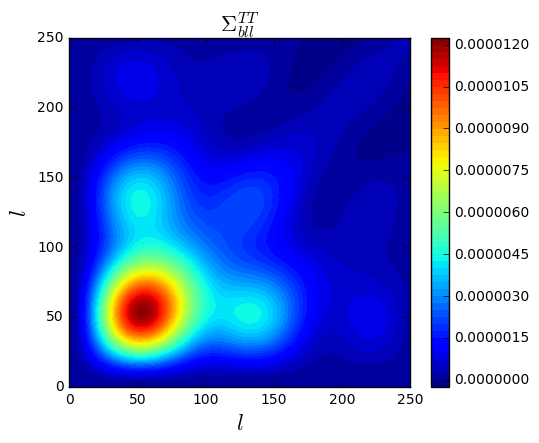

-----shapes------
Sigma_b_TT(shape) (251, 251)
[[ -2.86779752e-21   1.86406839e-20   5.59220517e-20 ...,   2.07691274e-19
    1.74666793e-19   1.42112810e-19]
 [  1.86406839e-20   4.06061500e-11   1.21656951e-10 ...,   3.14705950e-10
    2.27505038e-10   1.42047090e-10]
 [  5.73559505e-20   1.21656951e-10   3.64487028e-10 ...,   9.43314833e-10
    6.82117492e-10   4.26139160e-10]
 ..., 
 [  2.07685673e-19   3.14705949e-10   9.43314833e-10 ...,   2.70671482e-07
    2.70695193e-07   2.70018850e-07]
 [  1.74661192e-19   2.27505038e-10   6.82117492e-10 ...,   2.70695193e-07
    2.71545149e-07   2.71683096e-07]
 [  1.42106159e-19   1.42047090e-10   4.26139160e-10 ...,   2.70018850e-07
    2.71683096e-07   2.72626160e-07]]
b_T_ell_row(shape) (1, 251)
[[ 1.          0.9998633   0.99959002  0.99918039  0.99863476  0.9979536
   0.99713747  0.99618707  0.99510319  0.99388675  0.99253875  0.99106032
   0.98945266  0.9877171   0.98585503  0.98386795  0.98175746  0.97952521
   0.97717295  0.9747025

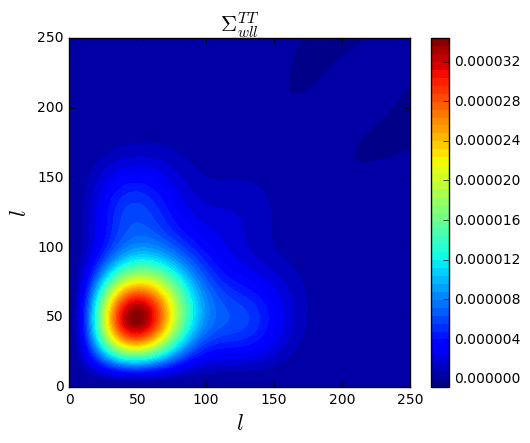

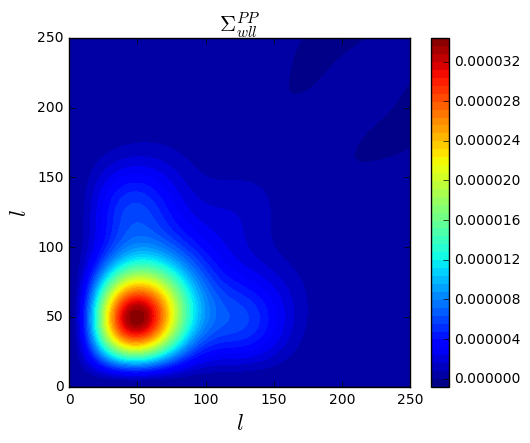

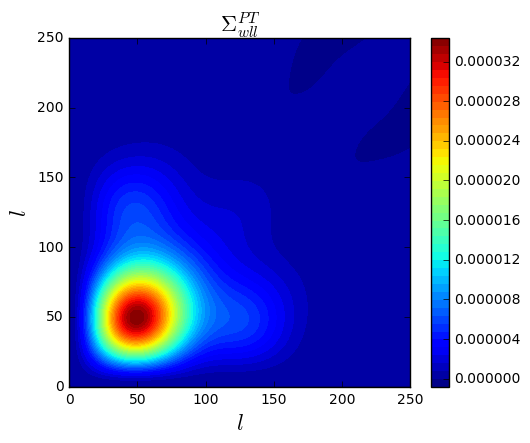

/Users/macbook/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:340: RuntimeWarning: invalid value encountered in sqrt
/Users/macbook/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:345: RuntimeWarning: invalid value encountered in divide
/Users/macbook/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:346: RuntimeWarning: invalid value encountered in divide


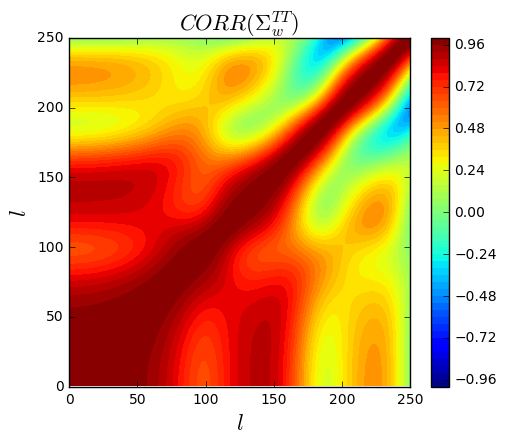

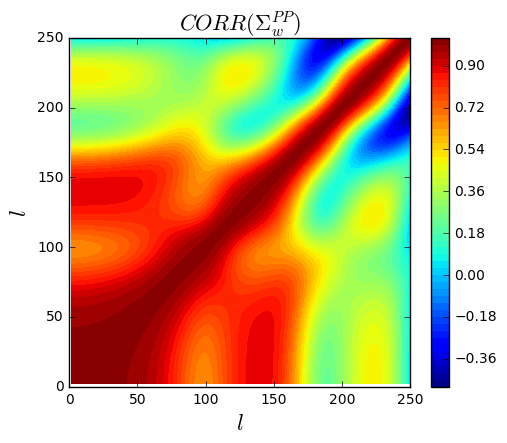

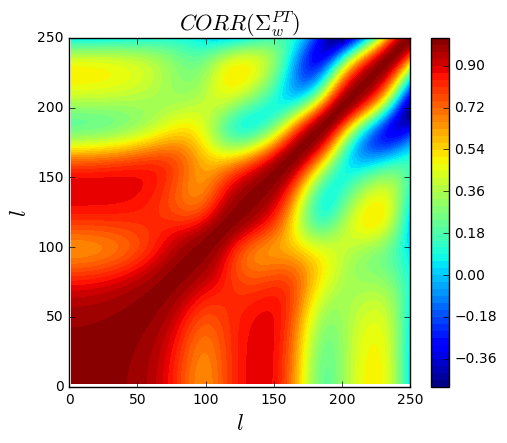

/Users/macbook/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:443: RuntimeWarning: invalid value encountered in sqrt


temperature normalized beam error


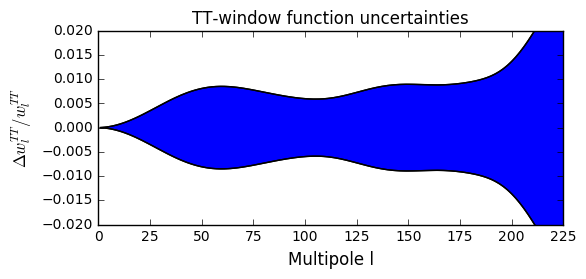

polarization Fractional uncertainty normalized beam


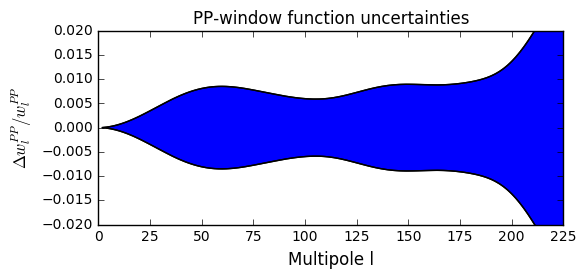

polarization window function- fractional uncertainty normalized window


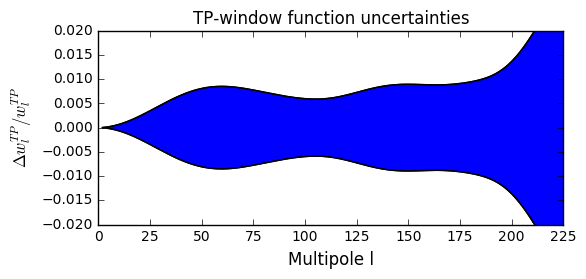

In [55]:
from decimal import *
getcontext().prec = 50

print getcontext()

def symmetrization(a):
    b = 0.5*(a + np.transpose(a)) 
    return b


l_max       = 250
i_max       = 12

l            = np.arange(0, l_max + 1, 1) 

sigma        = np.loadtxt('sigma_focal_plane.txt',  dtype = float, ndmin = 1)[0]
norm_coef    = np.loadtxt('normalized_parameters_focal_plane.txt', dtype = float)
norm_cov     = np.loadtxt('normalized_covariance_focal_plane.txt', dtype = float)[:i_max + 1, :i_max + 1]



#norm_cov     =(10**(-15))*np.loadtxt('normalized_covariance_focal_plane.txt', dtype = float)[:i_max + 1, :i_max + 1]
#norm_cov     = np.loadtxt('covariance.txt', dtype = float)[:i_max + 1, :i_max + 1]

OMEGA        = np.loadtxt('OMEGA.txt', dtype = float, ndmin = 1)
Omega        = OMEGA[0]

name_T       = 'B_ell_T_i%s.txt' % str(l_max)
name_p       = 'B_ell_p_i%s.txt' % str(l_max)

BT           = np.loadtxt(name_T, dtype = float)[0:l_max + 1, 0:i_max + 1]
BP           = np.loadtxt(name_p, dtype = float)[0:l_max + 1, 0:i_max + 1]


############################################################
############################################################
########### Beam responses in harmonic space ###############
############################################################
############################################################


# Projecting with the coefficient

B_T_ell      = np.dot(BT, norm_coef[:i_max + 1])
B_T_ell      = B_T_ell.reshape((BT.shape[0],1))

# Normalization
b_T_ell        = B_T_ell/OMEGA[0]
b_T_ell_row    = b_T_ell.reshape(1, b_T_ell.shape[0])
b_T_ell_column = b_T_ell.reshape(b_T_ell.shape[0],1)

# Projecting with the coefficient
B_P_ell        = np.dot(BP, norm_coef[:i_max + 1])
B_P_ell        = B_P_ell.reshape((BP.shape[0],1))

# Normalization
b_p_ell        = B_P_ell/OMEGA[0]
b_p_ell_row    = b_p_ell.reshape(1, b_p_ell.shape[0])
b_p_ell_column = b_p_ell.reshape(b_p_ell.shape[0],1)


# Covariance matrix from the fit coeficients. 
# This product generate a  l by l matrix.

Sigma_BTT = np.dot( BT, np.dot(norm_cov, BT.transpose() ) )
Sigma_BPP = np.dot( BP, np.dot(norm_cov, BP.transpose() ) )
Sigma_BPT = np.dot( BP, np.dot(norm_cov, BT.transpose() ) )
Sigma_BTP = np.dot( BT, np.dot(norm_cov, BP.transpose() ) )

###########################################################
# Constructing sigma matrices for cross polarization-temp.
###########################################################
## Observation: again unormalized quantities is being used.
###########################################################
# Matrices for cross PT correlation.
###########################################################

# 1st matrix.
Sigma_B_TT_01     =  Sigma_BTT
Sigma_B_PP_01     =  Sigma_BPP
Sigma_B_PT_01     =  Sigma_BPT
Sigma_B_TP_01     =  Sigma_BTP


# 2nd matrix. one for each covariance matrix.

print 'Sigma_B_TT_01[0,0]=', Sigma_B_TT_01[0,0] 

SigmaTT_00        = Sigma_BTT[0,0]
SigmaTT_00        = Sigma_BTT[0,0]
SigmaTT_00        = Sigma_BTT[0,0]
SigmaTT_00        = Sigma_BTT[0,0]


Sigma_B_TT_02     = SigmaTT_00*np.kron(b_T_ell_column, b_T_ell_row) 
Sigma_B_PP_02     = SigmaTT_00*np.kron(b_p_ell_column, b_p_ell_row) 
Sigma_B_PT_02     = SigmaTT_00*np.kron(b_p_ell_column, b_T_ell_row) 
Sigma_B_TP_02     = SigmaTT_00*np.kron(b_T_ell_column, b_p_ell_row) 

print 'Sigma_B_TT_02[0,0]=', Sigma_B_TT_02[0,0]


# 3rd matrix.
Sigma_BTT         = Sigma_BTT
Sigma_BTP         = Sigma_BTP
Sigma_BTT         = Sigma_BTT
Sigma_BTP         = Sigma_BTP

# Generate rows
Sigma_BTT_row     = Sigma_BTT[0,:l_max + 1]
Sigma_BTP_row     = Sigma_BTP[0,:l_max + 1]
Sigma_BTT_row     = Sigma_BTT[0,:l_max + 1]
Sigma_BTP_row     = Sigma_BTP[0,:l_max + 1]

# Generate columns

b_T_ell_column    = b_T_ell.reshape(b_T_ell.shape[0],1)
b_p_ell_column    = b_p_ell.reshape(b_p_ell.shape[0],1) 
b_p_ell_column    = b_p_ell.reshape(b_p_ell.shape[0],1)
b_T_ell_column    = b_T_ell.reshape(b_T_ell.shape[0],1)
 

Sigma_B_TT_03     = np.kron(b_T_ell_column, Sigma_BTT_row)
Sigma_B_PP_03     = np.kron(b_p_ell_column, Sigma_BTP_row)
Sigma_B_PT_03     = np.kron(b_p_ell_column, Sigma_BTT_row)
Sigma_B_TP_03     = np.kron(b_T_ell_column, Sigma_BTP_row)


print 'Sigma_B_TT_03[0,0]=', Sigma_B_TT_03[0,0]


# 4th matrix.
Sigma_BTT         = Sigma_BTT
Sigma_BPT         = Sigma_BPT
Sigma_BTT         = Sigma_BTT
Sigma_BPT         = Sigma_BPT


Sigma_BTT_column  = Sigma_BTT[:l_max + 1,0]
Sigma_BPT_column  = Sigma_BPT[:l_max + 1,0]
Sigma_BPT_column  = Sigma_BPT[:l_max + 1,0]
Sigma_BTT_column  = Sigma_BTT[:l_max + 1,0]
#print 'Sigma_BTT_column', Sigma_BTT_column


Sigma_BTT_column =  Sigma_BTT_column.reshape(Sigma_BTT_column.shape[0],1)
Sigma_BPT_column =  Sigma_BPT_column.reshape(Sigma_BPT_column.shape[0],1)
Sigma_BPT_column =  Sigma_BPT_column.reshape(Sigma_BPT_column.shape[0],1)
Sigma_BTT_column =  Sigma_BTT_column.reshape(Sigma_BTT_column.shape[0],1)
#print 'Sigma_BTT_column', Sigma_BTT_column

b_T_ell_row       = b_T_ell.reshape(1,b_T_ell.shape[0])
b_p_ell_row       = b_p_ell.reshape(1,b_p_ell.shape[0]) 
b_T_ell_row       = b_T_ell.reshape(1,b_T_ell.shape[0]) 
b_p_ell_row       = b_p_ell.reshape(1,b_p_ell.shape[0])
#print 'b_T_ell_row', b_T_ell_row 


Sigma_BTT_column =  Sigma_BTT_column.reshape(Sigma_BTT_column.shape[0],1)
Sigma_BPT_column =  Sigma_BPT_column.reshape(Sigma_BPT_column.shape[0],1)
Sigma_BPT_column =  Sigma_BPT_column.reshape(Sigma_BPT_column.shape[0],1)
Sigma_BTT_column =  Sigma_BTT_column.reshape(Sigma_BTT_column.shape[0],1)
#print 'Sigma_BTT_column', Sigma_BTT_column


#print 'Sigma_B_TT_04(advanced)', Sigma_BTT_column[0,0]


Sigma_B_TT_04     = np.kron(Sigma_BTT_column, b_T_ell_row)
Sigma_B_PP_04     = np.kron(Sigma_BPT_column, b_p_ell_row)
Sigma_B_PT_04     = np.kron(Sigma_BPT_column, b_T_ell_row)
Sigma_B_TP_04     = np.kron(Sigma_BTT_column, b_p_ell_row)


print 'Sigma_B_TT_04[0,0]=', Sigma_B_TT_04[0,0]
#print 'shape, Sigma_B_TT_04', Sigma_B_TT_04.shape

bla = Sigma_B_TT_01[0,0] + Sigma_B_TT_02[0,0] - Sigma_B_TT_03[0,0] - Sigma_B_TT_04[0,0]

print 'difference', bla



# Matrices

#Sigma_b_TT = (1.0/(Omega**2))*( symmetrization(Sigma_B_TT_01) + symmetrization(Sigma_B_TT_02) - symmetrization(Sigma_B_TT_03 + Sigma_B_TT_04))

Sigma_b_TT = (1.0/(Omega**2))*(Sigma_B_TT_01 + Sigma_B_TT_02 - Sigma_B_TT_03 - Sigma_B_TT_04)
Sigma_b_PP = (1.0/(Omega**2))*(Sigma_B_PP_01 + Sigma_B_PP_02 - Sigma_B_PP_03 - Sigma_B_PP_04)
Sigma_b_PT = (1.0/(Omega**2))*(Sigma_B_PT_01 + Sigma_B_PT_02 - Sigma_B_PT_03 - Sigma_B_PT_04)
Sigma_b_TP = (1.0/(Omega**2))*(Sigma_B_TP_01 + Sigma_B_TP_02 - Sigma_B_TP_03 - Sigma_B_TP_04)


#print  Sigma_b_TT[0,0]






print 'sigma_TT'

plt.close('all') 
fig1 = plt.figure()
beam_ftrans = plt.contourf(l,l, Sigma_b_TT, 50)
plt.title('$\Sigma_{bll}^{TT}$', fontsize= 16)

plt.xlabel('$l$',fontsize=16)
plt.ylabel('$l$',fontsize=16)

#colorbar
cbar = plt.colorbar(beam_ftrans)
cbar.ax.set_ylabel('',fontsize = 15)

#size modification
f = plt.gcf()
f.set_size_inches(5.5,4.5)

#plt.savefig("/home/bastian/window_function/TTTT.pdf", bbox_inches="tight") 
#plt.savefig("/home/bastian/window_function/TTTT.png", bbox_inches="tight") 

plt.show()
###########


###### Final Matrices ########
#b_T_ell_column = b_T_ell.reshape(b_T_ell.shape[0],1)
#b_T_ell_row    = b_T_ell.reshape(1,b_T_ell.shape[0])

#b_p_ell_column = b_p_ell.reshape(b_p_ell.shape[0],1)
#b_p_ell_row    = b_p_ell.reshape(1,b_p_ell.shape[0])



print '-----shapes------' 


print 'Sigma_b_TT(shape)', Sigma_b_TT.shape
print Sigma_b_TT
print 'b_T_ell_row(shape)', b_T_ell_row.shape
print b_T_ell_row
print 'b_T_ell_column(shape)', b_T_ell_column.shape
print b_T_ell_column


print '-----------------' 

# Three correlation matrices.
# window functions


TTTT =  b_T_ell_column*Sigma_b_TT*b_T_ell_row + b_T_ell_column*Sigma_b_TT*b_T_ell_row + b_T_ell_column*Sigma_b_TT*b_T_ell_row + b_T_ell_column*Sigma_b_TT*b_T_ell_row
PPPP =  b_p_ell_column*Sigma_b_PP*b_p_ell_row + b_p_ell_column*Sigma_b_PP*b_p_ell_row + b_p_ell_column*Sigma_b_PP*b_p_ell_row + b_p_ell_column*Sigma_b_PP*b_p_ell_row 
PTPT =  b_p_ell_column*Sigma_b_TT*b_p_ell_row + b_T_ell_column*Sigma_b_PP*b_T_ell_row + b_T_ell_column*Sigma_b_PT*b_p_ell_row + b_p_ell_column*Sigma_b_TP*b_T_ell_row

############################### Saving covariance matrices  ##################################
##############################################################################################
name_TT = 'TTTT%s.txt' % str(l_max)
name_PP = 'PPPP%s.txt' % str(l_max)
name_TP = 'TPTP%s.txt' % str(l_max)

np.savetxt(name_TT, TTTT, fmt='%s')
np.savetxt(name_PP, PPPP, fmt='%s')
np.savetxt(name_TP, PTPT, fmt='%s')

##############################################################################################
##############################################################################################
############################# Window function plots ##########################################
##############################################################################################
##############################################################################################

plt.close('all') 
fig1 = plt.figure()
beam_ftrans = plt.contourf(l,l, TTTT, 50)
plt.title('$\Sigma_{wll}^{TT}$', fontsize= 16)

plt.xlabel('$l$',fontsize=16)
plt.ylabel('$l$',fontsize=16)

#colorbar
cbar = plt.colorbar(beam_ftrans)
cbar.ax.set_ylabel('',fontsize = 15)

#size modification
f = plt.gcf()
f.set_size_inches(5.5,4.5)

#plt.savefig("/home/bastian/window_function/TTTT.pdf", bbox_inches="tight") 
#plt.savefig("/home/bastian/window_function/TTTT.png", bbox_inches="tight") 

plt.show()
##############################################################################################
plt.close('all') 
fig1 = plt.figure()
beam_ftrans = plt.contourf(l,l,PPPP, 50)
plt.title('$\Sigma_{wll}^{PP}$', fontsize= 16)

plt.xlabel('$l$',fontsize=16)
plt.ylabel('$l$',fontsize=16)

#colorbar
cbar = plt.colorbar(beam_ftrans)
cbar.ax.set_ylabel('',fontsize = 15)

#size modification
f = plt.gcf()
f.set_size_inches(5.5,4.5)

#plt.savefig("/home/bastian/window_function/PPPP.pdf", bbox_inches="tight") 
#plt.savefig("/home/bastian/window_function/PPPP.png", bbox_inches="tight") 

plt.show()
##############################################################################################
plt.close('all') 
fig1 = plt.figure()
beam_ftrans = plt.contourf(l,l,PTPT, 50)
plt.title('$\Sigma_{wll}^{PT}$', fontsize= 16)

plt.xlabel('$l$',fontsize=16)
plt.ylabel('$l$',fontsize=16)

#colorbar
cbar = plt.colorbar(beam_ftrans)
cbar.ax.set_ylabel('',fontsize = 15)

#size modification
f = plt.gcf()
f.set_size_inches(5.5,4.5)

#plt.savefig("/home/bastian/window_function/PTPT.pdf", bbox_inches="tight") 
#plt.savefig("/home/bastian/window_function/PTPT.png", bbox_inches="tight") 

plt.show()

##############################################################################################
diag_n_TT    = np.diag(TTTT)
diag_n_PP    = np.diag(PPPP)
diag_n_PT    = np.diag(PTPT)

norm_TT      = (np.outer(diag_n_TT, diag_n_TT))**0.5
norm_PP      = (np.outer(diag_n_PP, diag_n_PP))**0.5
norm_PT      = (np.outer(diag_n_PT, diag_n_PT))**0.5

corrmat_TT   = TTTT/norm_TT
corrmat_PP   = PPPP/norm_PP
corrmat_PT   = PTPT/norm_PT


name_corrmat_TT = 'corrmat_TT%s.txt' % str(l_max)
name_corrmat_PP = 'corrmat_PP%s.txt' % str(l_max)
name_corrmat_TP = 'corrmat_PT%s.txt' % str(l_max)

np.savetxt(name_corrmat_TT, corrmat_TT, fmt='%s')
np.savetxt(name_corrmat_PP, corrmat_PP, fmt='%s')
np.savetxt(name_corrmat_TP, corrmat_PT, fmt='%s')

###############################################################
###############################################################
plt.close('all') 
fig1 = plt.figure()
beam_ftrans = plt.contourf(l,l,corrmat_TT, 50)
plt.title('$CORR(\Sigma_{w}^{TT})$', fontsize= 16)

plt.xlabel('$l$',fontsize=16)
plt.ylabel('$l$',fontsize=16)

#colorbar
cbar = plt.colorbar(beam_ftrans)
cbar.ax.set_ylabel('',fontsize = 15)

#size modification
f = plt.gcf()
f.set_size_inches(5.5,4.5)

#plt.savefig("/home/bastian/window_function/PTPT.pdf", bbox_inches="tight") 
#plt.savefig("/home/bastian/window_function/corr_TTTT.png", bbox_inches="tight") 
#plt.savefig("/home/bastian/window_function/corr_TTTT.pdf", bbox_inches="tight") 

plt.show()

###############################################################
###############################################################
plt.close('all') 
fig1 = plt.figure()
beam_ftrans = plt.contourf(l,l,corrmat_PP, 50)
plt.title('$CORR(\Sigma_{w}^{PP})$', fontsize= 16)

plt.xlabel('$l$',fontsize = 16)
plt.ylabel('$l$',fontsize = 16)

#colorbar
cbar = plt.colorbar(beam_ftrans)
cbar.ax.set_ylabel('',fontsize = 15)

#size modification
f = plt.gcf()
f.set_size_inches(5.5,4.5)

#plt.savefig("/home/bastian/window_function/PTPT.pdf", bbox_inches="tight") 
#plt.savefig("/home/bastian/window_function/corr_PPPP.png", bbox_inches="tight") 
#plt.savefig("/home/bastian/window_function/corr_PPPP.pdf", bbox_inches="tight") 

plt.show()

###############################################################
###############################################################
plt.close('all') 
fig1 = plt.figure()
beam_ftrans = plt.contourf(l,l,corrmat_PT, 50)
plt.title('$CORR(\Sigma_{w}^{PT})$', fontsize= 16)

plt.xlabel('$l$',fontsize=16)
plt.ylabel('$l$',fontsize=16)

#colorbar
cbar = plt.colorbar(beam_ftrans)
cbar.ax.set_ylabel('',fontsize = 15)

#size modification
f = plt.gcf()
f.set_size_inches(5.5,4.5)

#plt.savefig("/home/bastian/window_function/PTPT.pdf", bbox_inches="tight") 
#plt.savefig("/home/bastian/window_function/corr_PTPT.png", bbox_inches="tight") 
#plt.savefig("/home/bastian/window_function/corr_PTPT.pdf", bbox_inches="tight") 

plt.show()

###############################################################
###############################################################
# This piece is not concluded
# Diagonals

diag_TT = np.diag(TTTT)[0:251]
diag_PP = np.diag(PPPP)[2:251]
diag_PT = np.diag(PTPT)[2:251]

b_T_ell = b_T_ell.reshape(b_T_ell.shape[0])
b_p_ell = b_p_ell.reshape(b_p_ell.shape[0])
b_p_ell = b_p_ell[2:251]

#fractional error.
w_ell_TT_f_error = (diag_TT/(b_T_ell)**4)**0.5
w_ell_PP_f_error = (diag_PP/(b_p_ell)**4)**0.5
w_ell_TP_f_error = (diag_PT/(((b_T_ell[2:251])*(b_p_ell))**2))**0.5


###############save############################################
name_TT_f_error = 'w_ell_TT_f_error%s.txt' % str(l_max)
name_PP_f_error = 'w_ell_PP_f_error%s.txt' % str(l_max)
name_TP_f_error = 'w_ell_TP_f_error%s.txt' % str(l_max)

np.savetxt(name_TT_f_error, w_ell_TT_f_error, fmt='%s')
np.savetxt(name_PP_f_error, w_ell_PP_f_error, fmt='%s')
np.savetxt(name_TP_f_error, w_ell_TP_f_error, fmt='%s')


############################################################
############################################################


ylim   = 0.02
deltal = 25

ticks_array = [0,25,50,75,100,125,150,175,200,225]



############################################################
#################### Plotting ##############################
############################################################
print 'temperature normalized beam error'
plt.close('all') 
f = plt.figure()
fig, (ax1) = plt.subplots(1, 1, sharex=True)

ax1.fill_between(l[0:251], w_ell_TT_f_error, -w_ell_TT_f_error)
ax1.set_ylabel('between y1 and y2')
ax1.set_xlabel('$l$')
ax1.set_title('TT-window function uncertainties')
plt.plot(l[0:251],  w_ell_TT_f_error,'k')
plt.plot(l[0:251], -w_ell_TT_f_error,'k')
plt.xlabel('Multipole l', size= 12)
plt.ylabel('$\Delta w_{l}^{TT}/w_{l}^{TT}$', size= 12) #fractional deviation
plt.xlim([0, l_max -deltal])

plt.ylim([-ylim,ylim])

ax1.set_xticks(ticks = ticks_array, minor = False)
ax1.set_yticks(ticks = [-1.0*ylim,-0.75*ylim,-0.5*ylim,-0.25*ylim,0,0.25*ylim,0.5*ylim,0.75*ylim, 1.0*ylim], minor = False)



f = plt.gcf()
f.set_size_inches(6.0,2.5)
#plt.savefig("/home/bastian/plots/window_uncertainties_TT.png", bbox_inches="tight")
#plt.savefig("/home/bastian/plots/window_uncertainties_TT.pdf", bbox_inches="tight")

plt.show()

############################################################
############################################################
############################################################
print 'polarization Fractional uncertainty normalized beam'

plt.close('all') 
f = plt.figure()
fig, (ax1) = plt.subplots(1, 1, sharex=True)

ax1.fill_between(l[2:251], w_ell_PP_f_error, -w_ell_PP_f_error)
ax1.set_ylabel('between y1 and y2')
ax1.set_xlabel('$l$')
ax1.set_title('PP-window function uncertainties')
plt.plot(l[2:251], w_ell_PP_f_error,'k')
plt.plot(l[2:251],-w_ell_PP_f_error,'k')
plt.xlabel('Multipole l', size= 12)
plt.ylabel('$ \Delta w_{l}^{PP}/w_{l}^{PP}$', size= 12)       #fractional deviation
plt.xlim([0, l_max - deltal])
plt.ylim([-ylim,ylim])

ax1.set_xticks(ticks = ticks_array, minor = False)
ax1.set_yticks(ticks = [-1.0*ylim,-0.75*ylim,-0.5*ylim,-0.25*ylim,0,0.25*ylim,0.5*ylim,0.75*ylim, 1.0*ylim], minor = False)



f = plt.gcf()
f.set_size_inches(6.0,2.5)
#plt.savefig("/home/bastian/plots/window_uncertainties_PP.png", bbox_inches="tight")
#plt.savefig("/home/bastian/plots/window_uncertainties_PP.pdf", bbox_inches="tight")

plt.show()
############################################################
############################################################
############################################################
print 'polarization window function- fractional uncertainty normalized window'

plt.clf()
f = plt.figure()
fig, (ax1) = plt.subplots(1, 1, sharex=True)

ax1.fill_between(l[2:251], w_ell_TP_f_error, -w_ell_TP_f_error)
ax1.set_ylabel('between y1 and y2')
ax1.set_xlabel('$l$')
ax1.set_title('TP-window function uncertainties')
plt.plot(l[2:251], w_ell_TP_f_error,'k')
plt.plot(l[2:251],-w_ell_TP_f_error,'k')
plt.xlabel('Multipole l', size= 12)
plt.ylabel('$ \Delta w_{l}^{TP}/w_{l}^{TP}$', size= 12)   

#fractional deviation
plt.xlim([0, l_max - deltal])
plt.ylim([-ylim,ylim])

ax1.set_xticks(ticks = ticks_array, minor = False)
ax1.set_yticks(ticks = [-1.0*ylim,-0.75*ylim,-0.5*ylim,-0.25*ylim,0,0.25*ylim,0.5*ylim,0.75*ylim, 1.0*ylim], minor = False)


f = plt.gcf()
f.set_size_inches(6.0,2.5)
#plt.savefig("/home/bastian/plots/window_uncertainties_TP.png", bbox_inches="tight")
#plt.savefig("/home/bastian/plots/window_uncertainties_TP.pdf", bbox_inches="tight")
plt.show()
############################################################
############################################################

# Composed plots

## Files
Input_files:

- w_ell_TT         = 'w_ell_TT%s.txt'         % str(l_max)
- w_ell_PP         = 'w_ell_PP%s.txt'         % str(l_max)
- w_ell_TP         = 'w_ell_TP%s.txt'         % str(l_max)
- w_ell_TT_f_error = 'w_ell_TT_f_error%s.txt' % str(l_max)
- w_ell_PP_f_error = 'w_ell_PP_f_error%s.txt' % str(l_max)
- w_ell_TP_f_error = 'w_ell_TP_f_error%s.txt' % str(l_max)



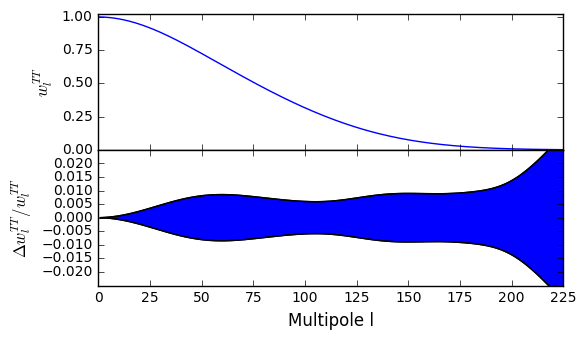

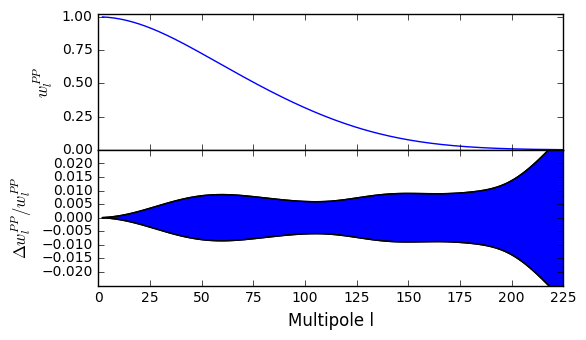

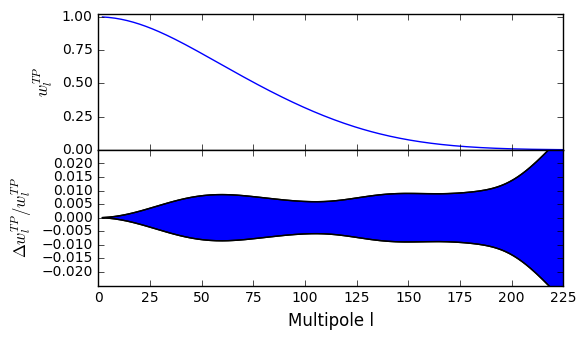

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import fft
from numpy.polynomial.hermite import hermval
from scipy.special import hermite
from scipy.special import legendre
import scipy.integrate as integrate


l_max           = 250
l               = np.arange(0, l_max + 1, 1) 

name_TT         = 'w_ell_TT%s.txt'         % str(l_max)
name_PP         = 'w_ell_PP%s.txt'         % str(l_max)
name_TP         = 'w_ell_TP%s.txt'         % str(l_max)
name_TT_f_error = 'w_ell_TT_f_error%s.txt' % str(l_max)
name_PP_f_error = 'w_ell_PP_f_error%s.txt' % str(l_max)
name_TP_f_error = 'w_ell_TP_f_error%s.txt' % str(l_max)


w_ell_TT         = np.loadtxt(name_TT, dtype = float)
w_ell_PP         = np.loadtxt(name_PP, dtype = float)
w_ell_TP         = np.loadtxt(name_TP, dtype = float)
w_ell_TT_f_error = np.loadtxt(name_TT_f_error, dtype = float)
w_ell_PP_f_error = np.loadtxt(name_TT_f_error, dtype = float)
w_ell_TP_f_error = np.loadtxt(name_TT_f_error, dtype = float)


ylim   = 0.02
deltal = 25

ticks_array = [0,25,50,75,100,125,150,175,200,225]

########################################################
########################################################
plt.close('all')        
f, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(l, w_ell_TT,label = 'Window function')
ax1.set_ylim([0,1.02])
ax1.set_ylabel('$w_{l}^{TT}$', size= 12) 
ax1.set_yticks(ticks = [0, 0.25 ,0.5, 0.75,1] ,minor=False)

ax2.fill_between(l, w_ell_TT_f_error, -w_ell_TT_f_error, label ='Uncertainty' )
ax2.plot(l, w_ell_TT_f_error ,'k')
ax2.plot(l,-w_ell_TT_f_error ,'k')
ax2.set_xlabel('Multipole l', size= 12)
ax2.set_ylabel('$\Delta w_{l}^{TT}/w_{l}^{TT}$', size= 12) 



ax2.set_ylim([-(ylim + 0.005),(ylim + 0.005)])
ax2.set_xticks(ticks = ticks_array ,minor=False)
ax2.set_xlim([0, l_max-deltal])
ax2.set_yticks(ticks = [-1.0*ylim,-0.75*ylim,-0.5*ylim,-0.25*ylim,0,0.25*ylim,0.5*ylim,0.75*ylim, 1.0*ylim], minor = False)




f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)  

f = plt.gcf()
f.set_size_inches(6.0,3.5)
#plt.savefig("/home/bastian/window_function/window_functionTT.pdf", bbox_inches="tight") 
#plt.savefig("/home/bastian/window_function/window_functionTT.png", bbox_inches="tight")  
plt.show()

##############################################################################################
plt.close('all')        
f, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(l[2:251], w_ell_PP[2:251],label = 'Window function')
ax1.set_ylim([0,1.02])
ax1.set_ylabel('$w_{l}^{PP}$', size= 12) 
ax1.set_yticks(ticks = [0, 0.25 ,0.5, 0.75,1] ,minor=False)

ax2.fill_between(l[2:251], w_ell_PP_f_error[2:251] , -w_ell_PP_f_error[2:251], label ='Uncertainty' )
ax2.plot(l[2:251], w_ell_PP_f_error[2:251] ,'k')
ax2.plot(l[2:251],-w_ell_PP_f_error[2:251] ,'k')
ax2.set_xlabel('Multipole l', size= 12)
ax2.set_ylabel('$\Delta w_{l}^{PP}/w_{l}^{PP}$', size= 12)      



ax2.set_ylim([-(ylim + 0.005),(ylim + 0.005)])
ax2.set_xticks(ticks = ticks_array ,minor=False)
ax2.set_xlim([0, l_max-deltal])
ax2.set_yticks(ticks = [-1.0*ylim,-0.75*ylim,-0.5*ylim,-0.25*ylim,0,0.25*ylim,0.5*ylim,0.75*ylim, 1.0*ylim], minor = False)



f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)  

f = plt.gcf()
f.set_size_inches(6.0,3.5)
#plt.savefig("/home/bastian/window_function/window_functionPP.pdf", bbox_inches="tight") 
#plt.savefig("/home/bastian/window_function/window_functionPP.png", bbox_inches="tight") 
plt.show()

##############################################################################################
plt.close('all')        
f, (ax1, ax2) = plt.subplots(2, sharex = True)

ax1.plot(l[2:251], w_ell_TP[2:251],label = 'Window function' )
ax1.set_ylim([0,1.02])
ax1.set_ylabel('$w_{l}^{TP}$', size= 12) 
ax1.set_yticks(ticks = [0, 0.25 ,0.5, 0.75,1] ,minor=False)

ax2.fill_between(l[2:251], w_ell_TP_f_error[2:251] , -w_ell_TP_f_error[2:251], label ='Uncertainty' )
ax2.plot(l[2:251], w_ell_TP_f_error[2:251] ,'k')
ax2.plot(l[2:251],-w_ell_TP_f_error[2:251] ,'k')
ax2.set_xlabel('Multipole l', size= 12)
ax2.set_ylabel('$\Delta w_{l}^{TP}/w_{l}^{TP}$', size= 12)  



ax2.set_ylim([-(ylim + 0.005),(ylim + 0.005)])
ax2.set_xticks(ticks = ticks_array ,minor=False)
ax2.set_xlim([0, l_max-deltal])
ax2.set_yticks(ticks = [-1.0*ylim,-0.75*ylim,-0.5*ylim,-0.25*ylim,0,0.25*ylim,0.5*ylim,0.75*ylim, 1.0*ylim], minor = False)


f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)  

f = plt.gcf()
f.set_size_inches(6.0,3.5)
#plt.savefig("/home/bastian/window_function/window_functionTP.pdf", bbox_inches="tight") 
#plt.savefig("/home/bastian/window_function/window_functionTP.png", bbox_inches="tight") 
plt.show()
##############################################################################################